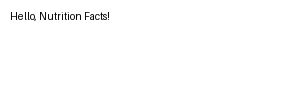

In [7]:
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display

# Create a simple image
img = Image.new('RGB', (300, 100), color='white')
draw = ImageDraw.Draw(img)
draw.text((10, 10), "Hello, Nutrition Facts!", fill='black')

# Display it inline in the notebook
display(img)


In [8]:
def draw_nutrition_label_fda_style_ascii(data, filename='label_fda_style_ascii.png'):
    width, height = 450, 950
    image = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(image)

    # Graceful fallback
    try:
        header_font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial Bold.ttf", 28)
        section_font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial Bold.ttf", 20)
        bold_font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial Bold.ttf", 16)
        regular_font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial.ttf", 16)
        small_font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial.ttf", 14)
    except:
        header_font = section_font = bold_font = regular_font = small_font = ImageFont.load_default()

    y = 10
    line_spacing = 26

    def draw_line(text, bold=False, indent=0, size='normal'):
        nonlocal y
        font = (
            header_font if size == 'header' else
            section_font if size == 'section' else
            bold_font if bold else
            small_font if size == 'small' else
            regular_font
        )
        draw.text((10 + indent, y), text, font=font, fill='black')
        y += line_spacing if size != 'small' else 22

    def draw_bar(height=5):
        nonlocal y
        draw.rectangle([0, y, width, y + height], fill='black')
        y += height + 5

    # Header
    draw_line("Nutrition Facts", size='header')
    draw_bar(7)

    draw_line(f"{data['servings_per_container']} servings per container", size='small')
    draw_line(f"Serving size  {data['serving_size']}", bold=True)
    draw_bar(7)

    draw_line("Amount per serving", size='small')
    draw_line(f"Calories  {data['calories']}", size='section')
    draw_bar(3)

    draw_line("% Daily Value*", size='small')
    draw_line(f"Total Fat {data['total_fat']}g", bold=True)
    draw_line(f"Saturated Fat {data['saturated_fat']}g", indent=20)
    draw_line(f"Trans Fat {data['trans_fat']}g", indent=20)
    draw_line(f"Cholesterol {data['cholesterol']}mg", bold=True)
    draw_line(f"Sodium {data['sodium']}mg", bold=True)
    draw_line(f"Total Carbohydrate {data['total_carbs']}g", bold=True)
    draw_line(f"Dietary Fiber {data['fiber']}g", indent=20)
    draw_line(f"Total Sugars {data['sugars']}g", indent=20)
    draw_line(f"Includes {data.get('added_sugars', 0)}g Added Sugars", indent=20)
    draw_line(f"Protein {data['protein']}g", bold=True)

    draw_bar(7)

    draw_line(f"Vitamin A {data['vitamin_a']}%  |  Vitamin C {data['vitamin_c']}%", size='small')
    draw_line(f"Calcium {data['calcium']}%  |  Iron {data['iron']}%", size='small')

    draw_line("* The % Daily Value (DV) tells you how much a nutrient", size='small')
    draw_line("in a serving of food contributes to a daily diet.", size='small')
    draw_line("2,000 calories a day is used for general nutrition advice.", size='small')

    return image

In [9]:
nutrition_data = {
    'serving_size': '1 cup (228g)',
    'servings_per_container': 2,
    'calories': 260,
    'calories_from_fat': 120,
    'total_fat': 13,
    'saturated_fat': 5,
    'trans_fat': 2,
    'cholesterol': 30,
    'sodium': 660,
    'total_carbs': 31,
    'fiber': 0,
    'sugars': 5,
    'protein': 5,
    'vitamin_a': 4,
    'vitamin_c': 2,
    'calcium': 15,
    'iron': 4
}

In [10]:
my_image = draw_nutrition_label_fallback(nutrition_data)

NameError: name 'draw_nutrition_label_fallback' is not defined

In [11]:
display(my_image)

NameError: name 'my_image' is not defined

In [12]:
def draw_nutrition_label_fallback(data, filename='label_output_fallback.png'):
    width, height = 400, 800
    image = Image.new('RGB', (width, height), color='white')
    draw = ImageDraw.Draw(image)

    # Graceful fallback to default font
    try:
        font_bold = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial Bold.ttf", 20)
        font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial.ttf", 16)
        font_small = ImageFont.truetype("/System/Library/Fonts/Supplemental/Arial.ttf", 14)
    except:
        font_bold = font = font_small = ImageFont.load_default()

    y = 10
    line_spacing = 28

    def draw_line(text, bold=False, indent=0, size='normal'):
        nonlocal y
        current_font = font_bold if bold else (font_small if size == 'small' else font)
        draw.text((10 + indent, y), text, font=current_font, fill='black')
        y += line_spacing if size != 'small' else 22

    def draw_bar(height=5):
        nonlocal y
        draw.rectangle([0, y, width, y + height], fill='black')
        y += height + 5

    draw_line("Nutrition Facts", bold=True)

    draw_bar(2)

    draw_line(f"Serving Size {data['serving_size']}")
    draw_line(f"Servings Per Container {data['servings_per_container']}")
    draw_bar(10)

    draw_line("Amount Per Serving", bold=True)
    draw_line(f"Calories {data['calories']}   Calories from Fat {data['calories_from_fat']}", bold=True)
    draw_bar(5)

    draw_line("% Daily Value*", bold=False)
    draw_line(f"Total Fat {data['total_fat']}g", bold=True)
    draw_line(f"Saturated Fat {data['saturated_fat']}g", indent=20)
    draw_line(f"Trans Fat {data['trans_fat']}g", indent=20)

    draw_line(f"Cholesterol {data['cholesterol']}mg", bold=True)
    draw_line(f"Sodium {data['sodium']}mg", bold=True)
    draw_line(f"Total Carbohydrate {data['total_carbs']}g", bold=True)
    draw_line(f"Dietary Fiber {data['fiber']}g", indent=20)
    draw_line(f"Sugars {data['sugars']}g", indent=20)
    draw_line(f"Protein {data['protein']}g", bold=True)

    draw_bar(5)

    draw_line(f"Vitamin A {data['vitamin_a']}%   |   Vitamin C {data['vitamin_c']}%", size='small')
    draw_line(f"Calcium {data['calcium']}%     |   Iron {data['iron']}%", size='small')

    draw_line("* Percent Daily Values are based on a 2,000 calorie diet.", size='small')
    draw_line("Your Daily Values may be higher or lower depending on your calorie needs:", size='small')

    # Return the PIL Image object
    return image

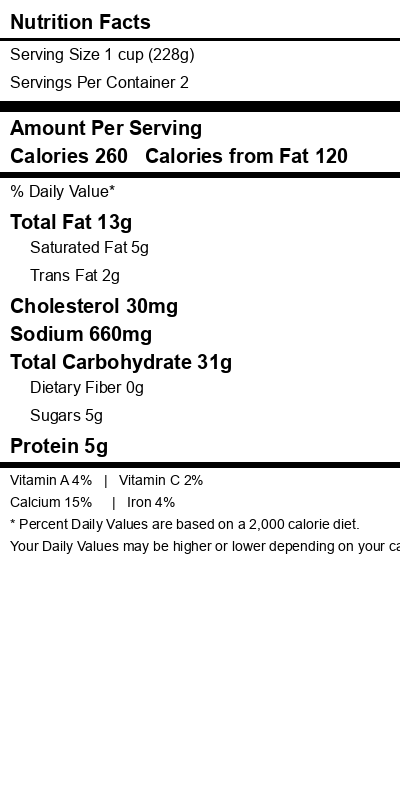

In [13]:
my_image = draw_nutrition_label_fallback(nutrition_data)
display(my_image)

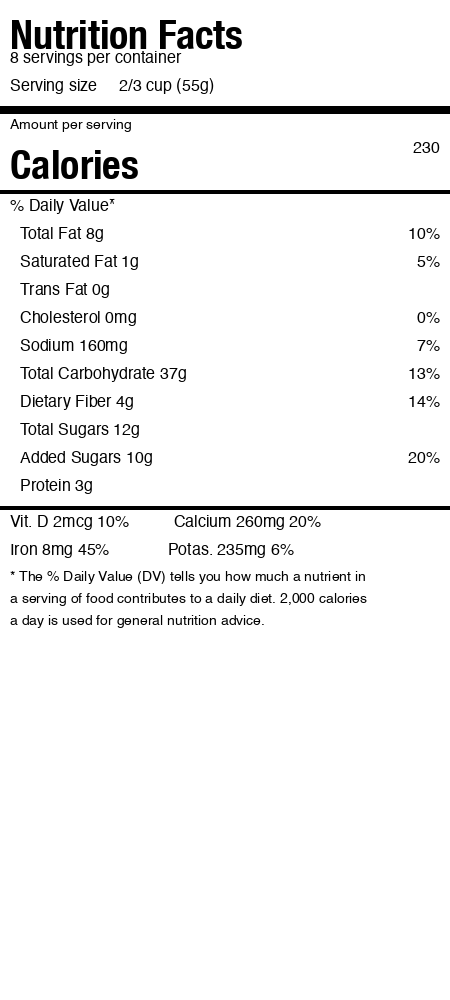

In [14]:
from PIL import Image, ImageDraw, ImageFont
# Try to load fonts or fall back
def load_fonts():
    try:
        return {
            "title": ImageFont.truetype("/System/Library/Fonts/Supplemental/HelveticaNeue.ttc", size=40, index=4),
            "subheader": ImageFont.truetype("/System/Library/Fonts/Supplemental/Helvetica.ttc", 18),
            "calories": ImageFont.truetype("/System/Library/Fonts/Supplemental/HelveticaNeue.ttc", size=40, index=4),
            "bold": ImageFont.truetype("/System/Library/Fonts/Supplemental/Helvetica.ttc", 16),
            "regular": ImageFont.truetype("/System/Library/Fonts/Supplemental/Helvetica.ttc", 16),
            "small": ImageFont.truetype("/System/Library/Fonts/Supplemental/Helvetica.ttc", 14),
        }
    except:
        default = ImageFont.load_default()
        return {k: default for k in ["title", "subheader", "calories", "bold", "regular", "small"]}

# Core function to draw the label
def draw_nutrition_label(data):
    width, height = 450, 1000
    image = Image.new('RGB', (width, height), 'white')
    draw = ImageDraw.Draw(image)
    fonts = load_fonts()
    y = 10

    def draw_line(text, bold=False, indent=0, size='normal', right_align_value=None):
        nonlocal y
        if size == 'title':
            font = fonts["title"]
            spacing = 40
        elif size == 'subheader':
            font = fonts["subheader"]
            spacing = 28
        elif size == 'calories':
            font = fonts["calories"]
            spacing = 50
        elif size == 'small':
            font = fonts["small"]
            spacing = 22
        else:
            font = fonts["bold"] if bold else fonts["regular"]
            spacing = 28
        draw.text((10 + indent, y), text, font=font, fill='black')
        if right_align_value:
            value_font = fonts["bold"] if bold else fonts["regular"]
            bbox = draw.textbbox((0, 0), right_align_value, font=value_font)
            w = bbox[2] - bbox[0]  # width = right - left
            draw.text((width - 10 - w, y), right_align_value, font=value_font, fill='black')
        y += spacing

    def draw_bar(thickness=5, margin=5):
        nonlocal y
        draw.rectangle([0, y, width, y + thickness], fill='black')
        y += thickness + margin

    # Draw header
    draw_line("Nutrition Facts", size='title')
    draw_line(f"{data['servings_per_container']} servings per container")
    draw_line(f"Serving size     {data['serving_size']}", bold=True)
    draw_bar(7)
    draw_line("Amount per serving", size='small')
    draw_line("Calories", size='calories', bold=True,right_align_value=str(data['calories']) )
    draw_bar(3)

    draw_line("% Daily Value*", bold=True)

    for nutrient in data["nutrients"]:
        name = nutrient["name"]
        amount = nutrient.get("amount", "")
        dv = nutrient.get("daily_value", "")
        label = f"{name} {amount}"
        draw_line(label, bold="Total" in name or "Includes" in name or "Protein" in name, indent=10, right_align_value=dv)

    draw_bar(3)

    # Micronutrients side-by-side
    micro = data.get("micronutrients", [])
    for i in range(0, len(micro), 2):
        left = f"{micro[i]['name']} {micro[i]['amount']} {micro[i]['daily_value']}"
        right = f"{micro[i+1]['name']} {micro[i+1]['amount']} {micro[i+1]['daily_value']}" if i+1 < len(micro) else ""
        draw_line(f"{left:<24} {right}")

    # Footer
    for line in data.get("footer", [
        "* The % Daily Value (DV) tells you how much a nutrient in",
        "a serving of food contributes to a daily diet. 2,000 calories",
        "a day is used for general nutrition advice."
    ]):
        draw_line(line, size='small')

    return image

# Example input
nutrition_data = {
    "servings_per_container": 8,
    "serving_size": "2/3 cup (55g)",
    "calories": 230,
    "nutrients": [
        {"name": "Total Fat", "amount": "8g", "daily_value": "10%"},
        {"name": "Saturated Fat", "amount": "1g", "daily_value": "5%"},
        {"name": "Trans Fat", "amount": "0g"},
        {"name": "Cholesterol", "amount": "0mg", "daily_value": "0%"},
        {"name": "Sodium", "amount": "160mg", "daily_value": "7%"},
        {"name": "Total Carbohydrate", "amount": "37g", "daily_value": "13%"},
        {"name": "Dietary Fiber", "amount": "4g", "daily_value": "14%"},
        {"name": "Total Sugars", "amount": "12g"},
        {"name": "Added Sugars", "amount": "10g", "daily_value": "20%"},
        {"name": "Protein", "amount": "3g"}
    ],
    "micronutrients": [
        {"name": "Vit. D", "amount": "2mcg", "daily_value": "10%"},
        {"name": "Calcium", "amount": "260mg", "daily_value": "20%"},
        {"name": "Iron", "amount": "8mg", "daily_value": "45%"},
        {"name": "Potas.", "amount": "235mg", "daily_value": "6%"}
    ]
}

# Render and show
label_img = draw_nutrition_label(nutrition_data)

from IPython.display import display
display(label_img)
